In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.1
num_bounces = 4
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = -0.095
    p_theta_end = -0.085
    p_phi_start = 0.053
    p_phi_end = 0.055
    h = 0.0001
#     p_theta_start = -0.050
#     p_theta_end = 0.01
#     p_phi_start = 0.030
#     p_phi_end = 0.034
#     h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

vz = np.log10((z-np.nanmin(z))/(np.nanmax(z)-np.nanmin(z)))
h = plt.pcolor(x,y,vz)

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

/Users/edwajohn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


(min - max): 0.0 - 3.624017739016889


# iPyWidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp
from ipywidgets import interactive, interact, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def f(x,y,energy,num_bounces):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy_widget = widgets.FloatSlider(min=-1/3, max=0, step=0.05, value=-1/4, description='Energy:')
num_bounces_widget = widgets.IntSlider(min=1, max=5, value=3, description='Num bounces:')
h_widget = widgets.FloatSlider(min=0.001, max=0.1, step=0.0005, value=0.01, readout_format='.3f', description='H:')
p_theta_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)
p_phi_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)

# def update_p_theta_range(*args):
#     p_theta_widget.max = np.sqrt((energy_widget.value + 1/3)*2)
# energy_widget.observe(update_p_theta_range, 'value')

# def update_p_phi_range(*args):
#     p_phi_widget.max = np.sqrt((energy_widget.value + 1/3)/5)
# energy_widget.observe(update_p_phi_range, 'value')

def func(energy, num_bounces, h, p_theta, p_phi):
#     p_theta = np.sqrt((energy + 1/3)*2)
#     p_phi = np.sqrt((energy + 1/3)/5)
#     x_range = np.arange(-p_theta, p_theta, h)
#     y_range = np.arange(-p_phi, p_phi, h)
    x_range = np.arange(-p_theta, p_theta, h)
    y_range = np.arange(-p_phi, p_phi, h)
    x, y = np.meshgrid(x_range, y_range)
    z = vf(x,y,energy,num_bounces)
#     z = f(x,y,energy,num_bounces)
    plt.pcolor(x,y,z)
    plt.colorbar()

w = interactive(func, energy=energy_widget, num_bounces=num_bounces_widget, h=h_widget, p_theta=p_theta_widget, p_phi=p_phi_widget)
display(w)

interactive(children=(FloatSlider(value=-0.25, description='Energy:', max=0.0, min=-0.3333333333333333, step=0.05), IntSlider(value=3, description='Num bounces:', max=5, min=1), FloatSlider(value=0.01, description='H:', max=0.1, min=0.001, readout_format='.3f', step=0.0005), FloatSlider(value=0.3, description='p_theta', max=0.8, step=0.001), FloatSlider(value=0.3, description='p_phi', max=0.8, step=0.001), Output()), _dom_classes=('widget-interact',))

# Find all local minima

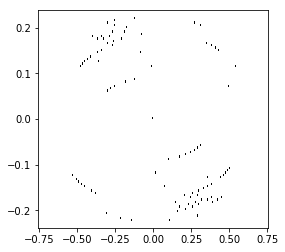

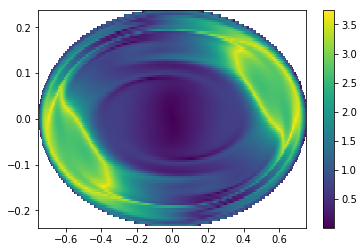

(min - max): 0.006503982684280844 - 3.7418166521885787
pr: 0.353133853244297
ptheta: 0.29722734729091993
pphi: -0.1880476142847616
fval: 0.031208865730469767

pr: 0.4844125444626916
ptheta: 0.2572273472909199
pphi: -0.16304761428476158
fval: 0.020155067172172993

pr: 0.47805029743534494
ptheta: 0.29722734729091993
pphi: -0.15804761428476158
fval: 0.10448858590308303

pr: 0.6918760093543834
ptheta: 0.10222734729091976
pphi: -0.08804761428476152
fval: 0.024829419623940665

pr: 0.7527422274350036
ptheta: -0.0027726527090803366
pphi: 0.0019523857152385637
fval: 0.006503982684280844

pr: 0.689917653490419
ptheta: -0.12277265270908044
pphi: 0.08695238571523864
fval: 0.018454395321754743

pr: 0.4823678272223742
ptheta: -0.26777265270908057
pphi: 0.1619523857152387
fval: 0.01820646314027629

pr: 0.35423642132335736
ptheta: -0.3027726527090806
pphi: 0.18695238571523873
fval: 0.04444823841079489



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

VARY_PTHETA_PPHI = 0
VARY_PTHETA_ENERGY = 1


def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.05
num_bounces = 3
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = 0.257
    p_theta_end = 0.337
    p_phi_start = -0.218
    p_phi_end = -0.158
    h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

grid_image = np.ones((z.shape[0], z.shape[1], 3))
minima = []
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        try:
            top_left = z[i - 1, j - 1]
        except IndexError:
            top_left = 100
        try:
            top = z[i - 1, j]
        except IndexError:
            top = 100
        try:
            top_right = z[i - 1, j + 1]
        except IndexError:
            top_right = 100
        try:
            left = z[i, j - 1]
        except IndexError:
            left = 100
        try:
            right = z[i, j + 1]
        except IndexError:
            right = 100
        try:
            bottom_left = z[i + 1, j - 1]
        except IndexError:
            bottom_left = 100
        try:
            bottom = z[i + 1, j]
        except IndexError:
            bottom = 100
        try:
            bottom_right = z[i + 1, j + 1]
        except IndexError:
            bottom_right = 100
        
        if (z[i, j] < top_left) \
            and (z[i, j] < top) \
            and (z[i, j] < top_right) \
            and (z[i, j] < left) \
            and (z[i, j] < right) \
            and (z[i, j] < bottom_left) \
            and (z[i, j] < bottom) \
            and (z[i, j] < bottom_right):
            grid_image[i, j, :] = [0, 0, 0]
            minima.append((x[i,j], y[i,j], z[i,j]))
            
h1 = plt.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
plt.show()
h2 = plt.pcolor(x,y,z)
plt.colorbar()
plt.show()

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

for row in minima:
    if abs(row[2] - np.nanmin(z)) < 0.1:
        print('pr:', np.sqrt(2*energy + 2/3 - row[0]**2 - 10*row[1]**2))
        print('ptheta:', row[0])
        print('pphi:', row[1])
        print('fval:', row[2])
        print()

# Identify minima of interest

4.500988473961526e-07


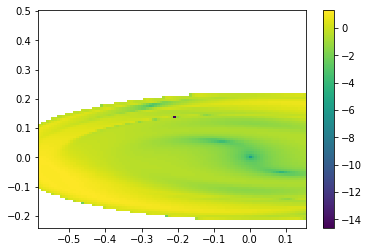

4.501284433584006e-07


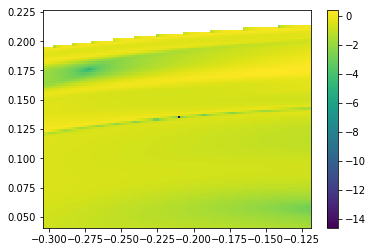

4.5011063187434543e-07


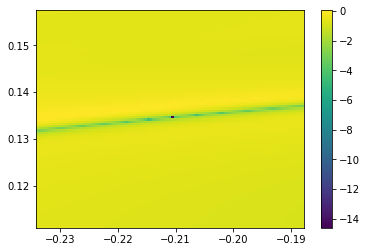

4.501103834851715e-07


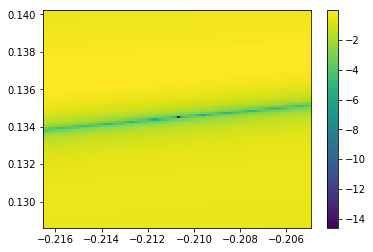

4.501209360497757e-07


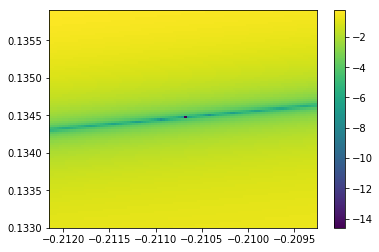

4.501083835881777e-07


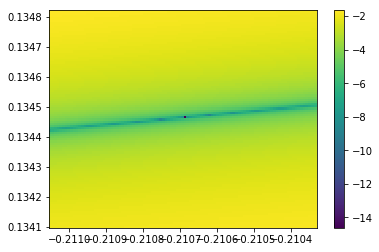

4.5011349183068183e-07


In [4]:
energy = -0.1
num_bounces = 4

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)


def plot_grid(p_theta_start, p_theta_end, p_phi_start, p_phi_end, grid_size):
    h_theta = (p_theta_end-p_theta_start)/grid_size
    h_phi = (p_phi_end-p_phi_start)/grid_size

    x_range = np.arange(p_theta_start, p_theta_end, h_theta)
    y_range = np.arange(p_phi_start, p_phi_end, h_phi)

    x, y = np.meshgrid(x_range, y_range)

    # %time z = vf(x,y)
    z = vf(x,y)

#     fig, (ax1, ax2) = plt.subplots(1,2)
#     fig.set_figheight(5)
#     fig.set_figwidth(13)
#     ax1.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    fig = plt.figure()
    pos = plt.pcolor(x,y,np.log(z))
    # pos = ax2.pcolor(x,y,z*z)
    fig.colorbar(pos)#,ax=ax2)
    plt.show()
    
    print(np.nanmin(z))

def plot_grid_center(ptheta, pphi, ptheta_width, pphi_height, grid_size):
    plot_grid(ptheta-ptheta_width/2, ptheta+ptheta_width/2, pphi-pphi_height/2, pphi+pphi_height/2, grid_size)

ptheta = -0.2106892
pphi = 0.1344638
ptheta = -0.210689118365980060
pphi = 0.134463771175102609
ptheta = -0.21068912
pphi = 0.13446377
w = 0.75

pr = 2*energy + 2/3 - ptheta**2 - 10*pphi**2
print(magphyxp.period(ptheta, pphi, num_bounces, energy))
    
    
for i in range(6):
    plot_grid_center(ptheta, pphi, w, w, 100)
    w = w / 4
# plot_grid(p_theta_start=-0.3, p_theta_end=0.1, p_phi_start=0.10, p_phi_end=0.21, grid_size=100)
# plot_grid(p_theta_start=-0.25, p_theta_end=-0.20, p_phi_start=0.13, p_phi_end=0.15, grid_size=100)


In [7]:
def plot_minima_center(p_theta_start, p_theta_end, p_phi_start, p_phi_end, grid_size):
    h_theta = (p_theta_end-p_theta_start)/grid_size
    h_phi = (p_phi_end-p_phi_start)/grid_size

    x_range = np.arange(p_theta_start, p_theta_end, h_theta)
    y_range = np.arange(p_phi_start, p_phi_end, h_phi)

    x, y = np.meshgrid(x_range, y_range)

    # %time z = vf(x,y)
    z = vf(x,y)

    #---------------------------------------
    # plot the local minima
    #---------------------------------------
    grid_image = np.ones((z.shape[0], z.shape[1], 3))
    minima = []
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            try:
                top_left = z[i - 1, j - 1]
            except IndexError:
                top_left = 100
            try:
                top = z[i - 1, j]
            except IndexError:
                top = 100
            try:
                top_right = z[i - 1, j + 1]
            except IndexError:
                top_right = 100
            try:
                left = z[i, j - 1]
            except IndexError:
                left = 100
            try:
                right = z[i, j + 1]
            except IndexError:
                right = 100
            try:
                bottom_left = z[i + 1, j - 1]
            except IndexError:
                bottom_left = 100
            try:
                bottom = z[i + 1, j]
            except IndexError:
                bottom = 100
            try:
                bottom_right = z[i + 1, j + 1]
            except IndexError:
                bottom_right = 100

            if (z[i, j] < top_left) \
                and (z[i, j] < top) \
                and (z[i, j] < top_right) \
                and (z[i, j] < left) \
                and (z[i, j] < right) \
                and (z[i, j] < bottom_left) \
                and (z[i, j] < bottom) \
                and (z[i, j] < bottom_right):
                grid_image[i, j, :] = [0, 0, 0]
                minima.append((x[i,j], y[i,j], z[i,j], i, j))

    #---------------------------------------
    # plot the minima and function image
    #---------------------------------------
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    # pos = ax2.pcolor(x,y,z*z)
    fig.colorbar(pos,ax=ax2)
    plt.show()
    print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))
    list.sort(minima)
    # for row in minima:
    #     print('ptheta:', row[0], 'pphi:', row[1], 'fval:', row[2])

    #---------------------------------------
    # Do the minimizations and store results
    # in real_minima
    #---------------------------------------
    real_minima = []
    minima_array = np.array(minima)
    minima_array = minima_array[:, 0:2]
    # print(minima)
    grid_image1 = np.ones((z.shape[0], z.shape[1], 3))
    for row in minima_array:
        m = magphyxp.calculate_min(row[0], row[1], num_bounces, energy, 0.00001, VARY_PTHETA_PPHI)
        if m.f < .001:
    #         print('{}\n\t{} {} {}'.format(row, m.ptheta, m.pphi, m.f))
            real_minima.append(m)
            pt = np.array((m.ptheta, m.pphi))
            i,j = find_indices(pt,x_range,y_range,h_theta,h_phi)
            try:
                grid_image1[i,j,:] = [0,0,0]
            except IndexError:
                print('Point', pt, 'not in grid')

    #---------------------------------------
    # Plot the global minima
    #---------------------------------------
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image1, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    fig.colorbar(pos,ax=ax2)
    plt.show()

    #list.sort(real_minima, key=lambda m: m.ptheta)
    minima = np.array(minima)
    print('Minima after running MagPhyxP:')
    #print(minima)
    for row1, row2 in zip(minima,real_minima):
    #     print('ptheta:', row.ptheta, 'pphi:', row.pphi, 'fval:', row.f)
    #    print('Before:', row1[:3], 'After:', np.array((row2.ptheta,row2.pphi,row2.f)))
        print('Before: {:>#.4} {:>#.4}\nAfter:  {:>#.4} {:>#.4} {:>#.4}'.format(
            row1[0], row1[1], row2.ptheta,row2.pphi,row2.f))
    print()
    # find unique points
    unique = []
    list.sort(real_minima, key=lambda m: m.ptheta)
    for item in real_minima:
        row = np.array([np.sqrt(2*energy + 2/3 - item.ptheta**2 - 10*item.pphi**2),item.ptheta, item.pphi, item.f, item.t])
    #     print(row)
        unique.append(row)

    a = np.around(unique, decimals=8)
    b = np.unique(a, axis=0)
    print('Unique minima:')
#     print(b[:, 1:])
    print(b)
    # print('Length:', len(b))
    
    #---------------------------------------
    # Plot the unique minima
    #---------------------------------------
    grid_image2 = np.ones((z.shape[0], z.shape[1], 3))
    for row in b:
        pt = np.array((row[1], row[2]))
        pt = np.around(pt, decimals=-int(np.log10(h_phi)))
        i,j = find_indices(pt,x_range,y_range,h_theta,h_phi)
        try:
            grid_image2[i,j,:] = [0,0,0]
        except IndexError:
            print('Point', pt, 'not in grid')
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image2, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    fig.colorbar(pos,ax=ax2)
    plt.show()
    
    # print('\n'.join('{} {} {}'.format(m.ptheta, m.pphi, m.f) for m in real_minima))
    # print('\n'.join('{:0.4} {:0.4} {:0.4}'.format(row[0], row[1], row[2]) for row in b))

    # filter for only the periodic solutions
#     periodic = []
    # for i in np.arange(len(b) - 1):
    #     next = i + 1
    #     if b[next, 0] == b[i, 0]:
    #         periodic.append(b[i,:])
    #         periodic.append(b[next,:])

    # periodic = np.array(periodic)
    # print(periodic)

    # fig3, ax4 = plt.subplots()
    # ax4.scatter(periodic[:,1],periodic[:,2])
    # ax4.scatter(unique[:,1],unique[:,2])
    # ax4.set_aspect(3)
    # ax4.set_xlim(-p_theta, p_theta)
    # ax4.set_ylim(-p_phi, p_phi)
    # plt.show()
    
def plot_minima(ptheta, pphi, ptheta_width, pphi_height, grid_size):
    plot_minima_center(ptheta-ptheta_width/2, ptheta+ptheta_width/2, pphi-pphi_height/2, pphi+pphi_height/2, grid_size)



# Test minima finding

/Users/edwajohn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


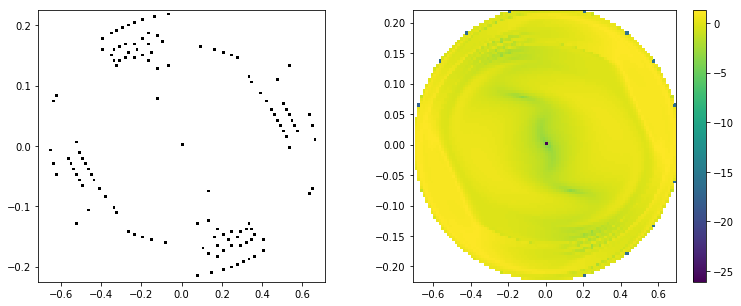

(min - max): 0.0 - 3.6555921983754938


/Users/edwajohn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:101: RuntimeWarning: divide by zero encountered in log


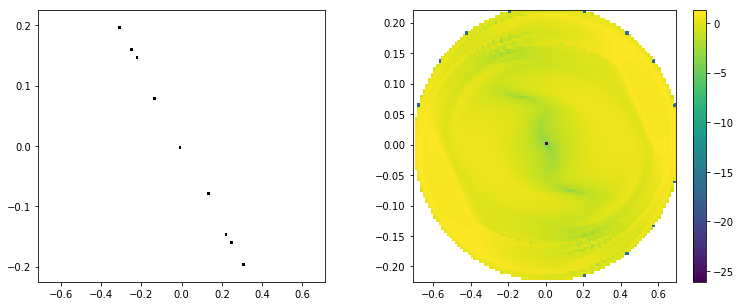

Minima after running MagPhyxP:
Before: -0.6549 -0.009004
After:  -0.3013 0.1937 3.099e-12
Before: -0.6406 -0.03151
After:  -0.3013 0.1937 4.301e-12
Before: -0.6406 0.07203
After:  -0.3013 0.1937 6.057e-12
Before: -0.6264 -0.04952
After:  -0.3013 0.1937 7.439e-12
Before: -0.6264 0.08103
After:  -0.2242 0.1464 9.436e-12
Before: -0.5694 -0.02251
After:  -0.3013 0.1937 2.634e-12
Before: -0.5552 -0.03151
After:  -0.2242 0.1464 5.434e-12
Before: -0.5410 -0.04052
After:  -0.2456 0.1594 3.753e-12
Before: -0.5267 -0.1306
After:  -0.1410 0.07788 4.732e-12
Before: -0.5267 -0.04952
After:  -1.332e-15 -1.665e-16 4.744e-12
Before: -0.5267 0.004502
After:  0.1410 -0.07788 6.082e-12
Before: -0.5125 -0.05852
After:  0.2456 -0.1594 5.072e-12
Before: -0.5125 -0.01351
After:  0.2242 -0.1464 4.846e-12
Before: -0.4983 -0.06753
After:  0.2242 -0.1464 6.205e-12
Before: -0.4983 -0.02251
After:  0.3013 -0.1937 4.959e-12
Before: -0.4840 -0.03151
After:  0.3013 -0.1937 5.919e-12
Before: -0.4698 -0.1080
After:  0.

/Users/edwajohn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in log


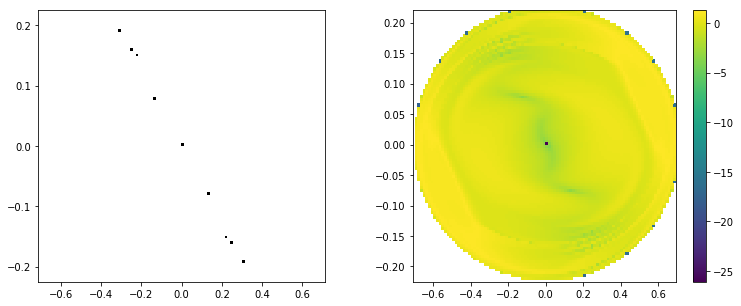

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def find_indices(point, xrange, yrange, h_theta, h_phi):
    ptheta = point[0]
    pphi = point[1]
    
    i, j = 0, 0
    for x in xrange:
        if abs(ptheta - x) < h_theta:
            break
        j += 1
        
    for y in yrange:
        if abs(pphi - y) < h_phi:
            break
        i += 1
        
    return i, j

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.08
# energy = -0.15
num_bounces = 5
ptheta_width = np.sqrt((energy + 1/3)*2)*2
pphi_width = np.sqrt((energy + 1/3)/5)*2

plot_minima(0, 0, ptheta_width, pphi_width, 100)
# plot_minima(0, 0, ptheta_width/4, pphi_width/4, 100)
# plot_minima(0.1617, -0.1033, ptheta_width/4, pphi_width/4, 100)
# plot_minima(0.1617, -0.1033, ptheta_width/8, pphi_width/8, 100)
# plot_minima(-0.3, 0.15, 0.1, 0.05, 1000)
# plot_minima(0, 0, ptheta_width, pphi_width, 100)
# plot_minima(p_theta_start=-p_theta, p_theta_end=p_theta, p_phi_start=-p_phi, p_phi_end=p_phi, grid_size=100)
# plot_minima(p_theta_start=0.0, p_theta_end=0.4, p_phi_start=-0.15, p_phi_end=-0.07, grid_size=100)
# plot_minima(p_theta_start=-0.3, p_theta_end=0.1, p_phi_start=0.10, p_phi_end=0.21, grid_size=100)
# plot_minima(p_theta_start=-0.25, p_theta_end=-0.20, p_phi_start=0.13, p_phi_end=0.15, grid_size=100)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def plot_minima_center(p_theta_start, p_theta_end, p_phi_start, p_phi_end, grid_size):
    h_theta = (p_theta_end-p_theta_start)/grid_size
    h_phi = (p_phi_end-p_phi_start)/grid_size

    x_range = np.arange(p_theta_start, p_theta_end, h_theta)
    y_range = np.arange(p_phi_start, p_phi_end, h_phi)

    x, y = np.meshgrid(x_range, y_range)

    # %time z = vf(x,y)
    z = vf(x,y)

    #---------------------------------------
    # plot the local minima
    #---------------------------------------
    grid_image = np.ones((z.shape[0], z.shape[1], 3))
    minima = []
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            try:
                top_left = z[i - 1, j - 1]
            except IndexError:
                top_left = 100
            try:
                top = z[i - 1, j]
            except IndexError:
                top = 100
            try:
                top_right = z[i - 1, j + 1]
            except IndexError:
                top_right = 100
            try:
                left = z[i, j - 1]
            except IndexError:
                left = 100
            try:
                right = z[i, j + 1]
            except IndexError:
                right = 100
            try:
                bottom_left = z[i + 1, j - 1]
            except IndexError:
                bottom_left = 100
            try:
                bottom = z[i + 1, j]
            except IndexError:
                bottom = 100
            try:
                bottom_right = z[i + 1, j + 1]
            except IndexError:
                bottom_right = 100

            if (z[i, j] < top_left) \
                and (z[i, j] < top) \
                and (z[i, j] < top_right) \
                and (z[i, j] < left) \
                and (z[i, j] < right) \
                and (z[i, j] < bottom_left) \
                and (z[i, j] < bottom) \
                and (z[i, j] < bottom_right):
                grid_image[i, j, :] = [0, 0, 0]
                minima.append((x[i,j], y[i,j], z[i,j], i, j))

    #---------------------------------------
    # plot the minima and function image
    #---------------------------------------
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    # pos = ax2.pcolor(x,y,z*z)
    fig.colorbar(pos,ax=ax2)
    plt.show()
    print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))
    list.sort(minima)
    # for row in minima:
    #     print('ptheta:', row[0], 'pphi:', row[1], 'fval:', row[2])

    #---------------------------------------
    # Do the minimizations and store results
    # in real_minima
    #---------------------------------------
    real_minima = []
    minima_array = np.array(minima)
    minima_array = minima_array[:, 0:2]
    # print(minima)
    grid_image1 = np.ones((z.shape[0], z.shape[1], 3))
    for row in minima_array:
        m = magphyxp.calculate_min(row[0], row[1], num_bounces, energy, 0.00001, VARY_PTHETA_PPHI)
        if m.f < .001:
    #         print('{}\n\t{} {} {}'.format(row, m.ptheta, m.pphi, m.f))
            real_minima.append(m)
            pt = np.array((m.ptheta, m.pphi))
            i,j = find_indices(pt,x_range,y_range,h_theta,h_phi)
            try:
                grid_image1[i,j,:] = [0,0,0]
            except IndexError:
                print('Point', pt, 'not in grid')

    #---------------------------------------
    # Plot the global minima
    #---------------------------------------
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image1, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    fig.colorbar(pos,ax=ax2)
    plt.show()

    #list.sort(real_minima, key=lambda m: m.ptheta)
    minima = np.array(minima)
    print('Minima after running MagPhyxP:')
    #print(minima)
    for row1, row2 in zip(minima,real_minima):
    #     print('ptheta:', row.ptheta, 'pphi:', row.pphi, 'fval:', row.f)
    #    print('Before:', row1[:3], 'After:', np.array((row2.ptheta,row2.pphi,row2.f)))
        print('Before: {:>#.4} {:>#.4}\nAfter:  {:>#.4} {:>#.4} {:>#.4}'.format(
            row1[0], row1[1], row2.ptheta,row2.pphi,row2.f))
    print()
    # find unique points
    unique = []
    list.sort(real_minima, key=lambda m: m.ptheta)
    for item in real_minima:
        row = np.array([np.sqrt(2*energy + 2/3 - item.ptheta**2 - 10*item.pphi**2),item.ptheta, item.pphi, item.f])
    #     print(row)
        unique.append(row)

    a = np.around(unique, decimals=8)
    b = np.unique(a, axis=0)
#     print('Unique minima:')
#     print(b[:, 1:])
#     print(b)
    # print('Length:', len(b))
    
    print('Unique minima:')
    print('name,r,theta,phi,pr,ptheta,pphi')
    i = 1
    for m in b:
        print('new {},1,0,0,{:>#.12},{:>#.12},{:>#.12}'.format(i, m[0], m[1], m[2]))
        i += 1
#     print(b[:, 1:])
#     print(b)
    
    #---------------------------------------
    # Plot the unique minima
    #---------------------------------------
    grid_image2 = np.ones((z.shape[0], z.shape[1], 3))
    for row in b:
        pt = np.array((row[1], row[2]))
        # pt = np.around(pt, decimals=-int(np.log10(h_phi)))
        i,j = find_indices(pt,x_range,y_range,h_theta,h_phi)
        try:
            grid_image2[i,j,:] = [0,0,0]
        except IndexError:
            print('Point', pt, 'not in grid')
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(13)
    ax1.imshow(grid_image2, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
    pos = ax2.pcolor(x,y,np.log(z))
    fig.colorbar(pos,ax=ax2)
    plt.show()
    
    # print('\n'.join('{} {} {}'.format(m.ptheta, m.pphi, m.f) for m in real_minima))
    # print('\n'.join('{:0.4} {:0.4} {:0.4}'.format(row[0], row[1], row[2]) for row in b))

    # filter for only the periodic solutions
#     periodic = []
    # for i in np.arange(len(b) - 1):
    #     next = i + 1
    #     if b[next, 0] == b[i, 0]:
    #         periodic.append(b[i,:])
    #         periodic.append(b[next,:])

    # periodic = np.array(periodic)
    # print(periodic)

    # fig3, ax4 = plt.subplots()
    # ax4.scatter(periodic[:,1],periodic[:,2])
    # ax4.scatter(unique[:,1],unique[:,2])
    # ax4.set_aspect(3)
    # ax4.set_xlim(-p_theta, p_theta)
    # ax4.set_ylim(-p_phi, p_phi)
    # plt.show()
    
def plot_minima(ptheta, pphi, ptheta_width, pphi_height, grid_size):
    plot_minima_center(ptheta-ptheta_width/2, ptheta+ptheta_width/2, pphi-pphi_height/2, pphi+pphi_height/2, grid_size)


def find_indices(point, xrange, yrange, h_theta, h_phi):
    ptheta = point[0]
    pphi = point[1]
    
    i, j = 0, 0
    for x in xrange:
        if abs(ptheta - x) < h_theta:
            break
        j += 1
        
    for y in yrange:
        if abs(pphi - y) < h_phi:
            break
        i += 1
        
    return i, j

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.11
# energy = -0.15
num_bounces = 17
ptheta_width = np.sqrt((energy + 1/3)*2)*2
pphi_width = np.sqrt((energy + 1/3)/5)*2

plot_minima(0, 0, ptheta_width, pphi_width, 100)
# plot_minima(0, 0, ptheta_width/4, pphi_width/4, 100)
# plot_minima(0.1617, -0.1033, ptheta_width/4, pphi_width/4, 100)
# plot_minima(0.1617, -0.1033, ptheta_width/8, pphi_width/8, 100)
# plot_minima(-0.3, 0.15, 0.1, 0.05, 1000)
# plot_minima(p_theta_start=-p_theta, p_theta_end=p_theta, p_phi_start=-p_phi, p_phi_end=p_phi, grid_size=100)
# plot_minima(p_theta_start=0.0, p_theta_end=0.4, p_phi_start=-0.15, p_phi_end=-0.07, grid_size=100)
# plot_minima(p_theta_start=-0.3, p_theta_end=0.1, p_phi_start=0.10, p_phi_end=0.21, grid_size=100)
# plot_minima(p_theta_start=-0.25, p_theta_end=-0.20, p_phi_start=0.13, p_phi_end=0.15, grid_size=100)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

def plot_minima_center(p_theta_start, p_theta_end, p_phi_start, p_phi_end, grid_size, energy, num_bounces):
    h_theta = (p_theta_end-p_theta_start)/grid_size
    h_phi = (p_phi_end-p_phi_start)/grid_size

    x_range = np.arange(p_theta_start, p_theta_end, h_theta)
    y_range = np.arange(p_phi_start, p_phi_end, h_phi)
    
    vf = np.vectorize(f)

    x, y = np.meshgrid(x_range, y_range)

    # %time z = vf(x,y)
    z = vf(x,y)

    #---------------------------------------
    # find local minima
    #---------------------------------------
    minima = []
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            try:
                top_left = z[i - 1, j - 1]
            except IndexError:
                top_left = 100
            try:
                top = z[i - 1, j]
            except IndexError:
                top = 100
            try:
                top_right = z[i - 1, j + 1]
            except IndexError:
                top_right = 100
            try:
                left = z[i, j - 1]
            except IndexError:
                left = 100
            try:
                right = z[i, j + 1]
            except IndexError:
                right = 100
            try:
                bottom_left = z[i + 1, j - 1]
            except IndexError:
                bottom_left = 100
            try:
                bottom = z[i + 1, j]
            except IndexError:
                bottom = 100
            try:
                bottom_right = z[i + 1, j + 1]
            except IndexError:
                bottom_right = 100

            if (z[i, j] < top_left) \
                and (z[i, j] < top) \
                and (z[i, j] < top_right) \
                and (z[i, j] < left) \
                and (z[i, j] < right) \
                and (z[i, j] < bottom_left) \
                and (z[i, j] < bottom) \
                and (z[i, j] < bottom_right):
                minima.append((x[i,j], y[i,j], z[i,j], i, j))

    #---------------------------------------
    # Do the minimizations and store results
    # in real_minima
    #---------------------------------------
    real_minima = []
    minima_array = np.array(minima)
    minima_array = minima_array[:, 0:2]
    for row in minima_array:
        m = magphyxp.calculate_min(row[0], row[1], num_bounces, energy, 0.00001, VARY_PTHETA_PPHI)
        if m.f < .001:
            real_minima.append(m)

    #---------------------------------------
    # Find the unique minima
    #---------------------------------------
    unique = []
    list.sort(real_minima, key=lambda m: m.ptheta)
    for item in real_minima:
        row = np.array([np.sqrt(2*energy + 2/3 - item.ptheta**2 - 10*item.pphi**2),item.ptheta, item.pphi, item.f])
    #     print(row)
        unique.append(row)

    a = np.around(unique, decimals=8)
    b = np.unique(a, axis=0)
    
    print('\t\tUnique minima:')
    print('\t\tname,r,theta,phi,pr,ptheta,pphi')
    i = 1
    for m in b:
        print('\t\tnew {},1,0,0,{:>#.12},{:>#.12},{:>#.12}'.format(i, m[0], m[1], m[2]))
        i += 1

for energy in np.arange(-0.33,-0.1,0.01):
    for num_bounces in range(1,10):
        ptheta_width = np.sqrt((energy + 1/3)*2)*2
        pphi_width = np.sqrt((energy + 1/3)/5)*2
        print('Energy: {:>#.2}'.format(energy))
        print('\tBounces:',num_bounces)

        plot_minima_center(-ptheta_width, ptheta_width, -pphi_width, pphi_width, 100, energy, num_bounces)


In [ ]:
a = [1, 2, 3]
print('\n'.join('{}'.format(x) for x in a))

In [4]:
import magphyxp
import numpy as np
VARY_PTHETA_PPHI = 0
VARY_PTHETA_ENERGY = 1
# print(magphyxp.period(-0.08959999, 0.0543, 4, -0.1))
# m = magphyxp.calculate_min(-0.08959999, 0.0543, 4, -0.1, VARY_PTHETA_PPHI)
# print(m.ptheta)
# print(m.pphi)
# print(m.f)

E = np.linspace(-1/3,-.05,100)

unique = []
f = open('output.txt','w')
for num_bounces in range(2,7):
    f.write('Bounces: {}\n'.format(num_bounces))
    for item in E:
        m = magphyxp.calculate_min(1e-6, 1e-6, num_bounces, item, 0.000001, VARY_PTHETA_ENERGY)
        row = np.array([num_bounces,np.sqrt(abs(2*m.energy + 2/3 - m.ptheta**2 - 10*m.pphi**2)),m.ptheta, m.pphi,m.energy])
#         print(row)
#         unique.append(row)
#         print('\tEnergy:', item)
#         print('\t\tname,r,theta,phi,pr,ptheta,pphi')
        if m.f < 1e-9:
            f.write("\tstart E:{:<.4} ptheta:{:<.4} pphi:{:<.4} energy:{:<.4} fval:{:<.4} t:{:<.4}\n".format(item,m.ptheta,m.pphi,m.energy,m.f,m.t))
        
f.close()
print('done')
# a = np.around(unique, decimals=5)
# b = np.unique(a, axis=0)
# i = 1
# for row in b:
#     print('Bounces: {}'.format(row[0]))
#     print('\tEnergy:',row[4])
#     print('\t\tUnique minima:')
#     print('\t\tname,r,theta,phi,pr,ptheta,pphi')
#     print('\t\tnew {:d},1,0,0,{:>#.12},{:>#.12},{:>#.12}'.format(i, row[1], row[2], row[3]))

done


# Output to JSON

## This version takes input of the form:
```
Bounces: 1
	Energy: -0.33
		Unique minima:
		name,r,theta,phi,pr,ptheta,pphi
		new 1,1,0,0,0.0816496600000,0.00000000000,-0.00000000000
	Energy: -0.32
		Unique minima:
		name,r,theta,phi,pr,ptheta,pphi
		new 1,1,0,0,0.163299320000,-0.00000000000,-0.00000000000
    ...
Bounces: 2
	Energy: -0.33
		Unique minima:
		name,r,theta,phi,pr,ptheta,pphi
		new 1,1,0,0,0.0816496600000,0.00000000000,-0.00000000000
	Energy: -0.32
		Unique minima:
		name,r,theta,phi,pr,ptheta,pphi
		new 1,1,0,0,0.163299320000,-0.00000000000,-0.00000000000
```

In [ ]:
import json

data = []
with open('./vis/output.txt', 'r') as infile:
    for line in infile:
#         print(line)
        line = line.strip()
        if 'Bounces' in line:
            bounces = {
                'numBounces' : int(line.split(' ')[1]),
                'energies' : []
            }
            data.append(bounces)
        if 'Energy' in line:
            energy = {
                'energy' : float(line.split(' ')[1]),
                'minima' : []
            }
            bounces['energies'].append(energy)
        if 'new' in line:
            v = [float(x) for x in line.split(',')[1:]]
            values = {
                'r' : v[0],
                'theta' : v[1],
                'phi' : v[2],
                'pr' : v[3],
                'ptheta' : v[4],
                'pphi' : v[5]
            }
            energy['minima'].append(values)

with open('./vis/output.json', 'w') as outfile:  
    json.dump(data, outfile)
print('done')

## This version takes input of the form:
```
Bounces: 2
	start E:-0.3333 ptheta:1e-06 pphi:1e-06 energy:-0.3333 fval:0.0 t:xx
	start E:-0.3305 ptheta:-1.037e-06 pphi:1e-06 energy:-0.3333 fval:0.0 t:xx
	start E:-0.3276 ptheta:1.184e-06 pphi:1e-06 energy:-0.3333 fval:0.0 t:xx
    ...
Bounces: 3
	start E:-0.2818 ptheta:-1.586e-06 pphi:1e-06 energy:-0.2389 fval:1.595e-12 t:xx
	start E:-0.279 ptheta:-1.586e-06 pphi:1e-06 energy:-0.2389 fval:1.334e-12 t:xx
	start E:-0.2761 ptheta:-1.586e-06 pphi:1e-06 energy:-0.2389 fval:1.587e-12 t:xx

```

In [5]:
import json
import re

data = []
with open('./vis/output2.txt', 'r') as infile:
    for line in infile:
#         print(line)
        line = line.strip()
        if 'Bounces' in line:
            bounces = {
                'numBounces' : int(line.split(' ')[1]),
                'energies' : []
            }
            data.append(bounces)
        if 'start' in line:
#             print(re.split(' |,|:', line))
            (_,_,startE,_,ptheta,_,pphi,_,E,_,fval,_,t) = re.split(' |,|:', line)
            (startE,ptheta,pphi,E,fval,t) = map(lambda x:float(x), (startE,ptheta,pphi,E,fval,t))
#             print(startE,ptheta,pphi,E,fval)
            energy = {
                'energy' : E,
                'minima' : []
            }
            bounces['energies'].append(energy)
            
            r = 1
            theta = 0
            phi = 0
            pr = 2*E + 2/3 - ptheta**2 - 10*pphi**2

            values = {
                'r' : r,
                'theta' : theta,
                'phi' : phi,
                'pr' : pr,
                'ptheta' : ptheta,
                'pphi' : pphi,
                't' : t
            }
            energy['minima'].append(values)
#         if 'new' in line:
#             v = [float(x) for x in line.split(',')[1:]]
#             values = {
#                 'r' : v[0],
#                 'theta' : v[1],
#                 'phi' : v[2],
#                 'pr' : v[3],
#                 'ptheta' : v[4],
#                 'pphi' : v[5]
#             }
#             energy['minima'].append(values)

with open('./vis/output2.json', 'w') as outfile:  
    json.dump(data, outfile)
print('done')

done
